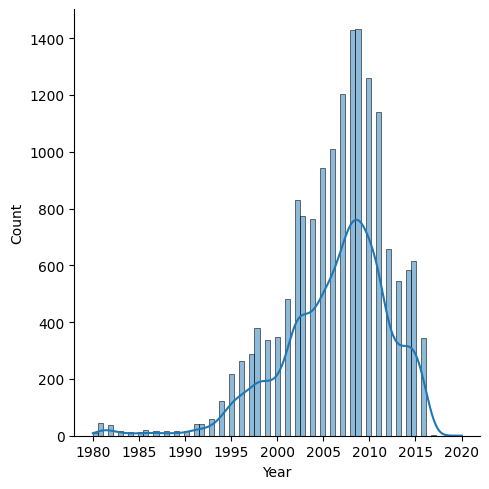

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('vgsales.csv')

# Create a distribution plot
sns.displot(data['Year'], kde=True)

Nhận xét số lượng game phát hành từ năm 1980 đến năm 2020:
    + Số game phát hành có sự tăng dần từ năm 1995 và cao nhất vào năm 2009
    + 

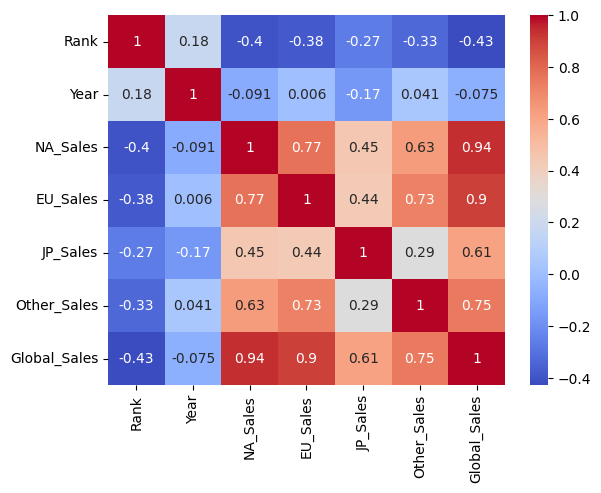

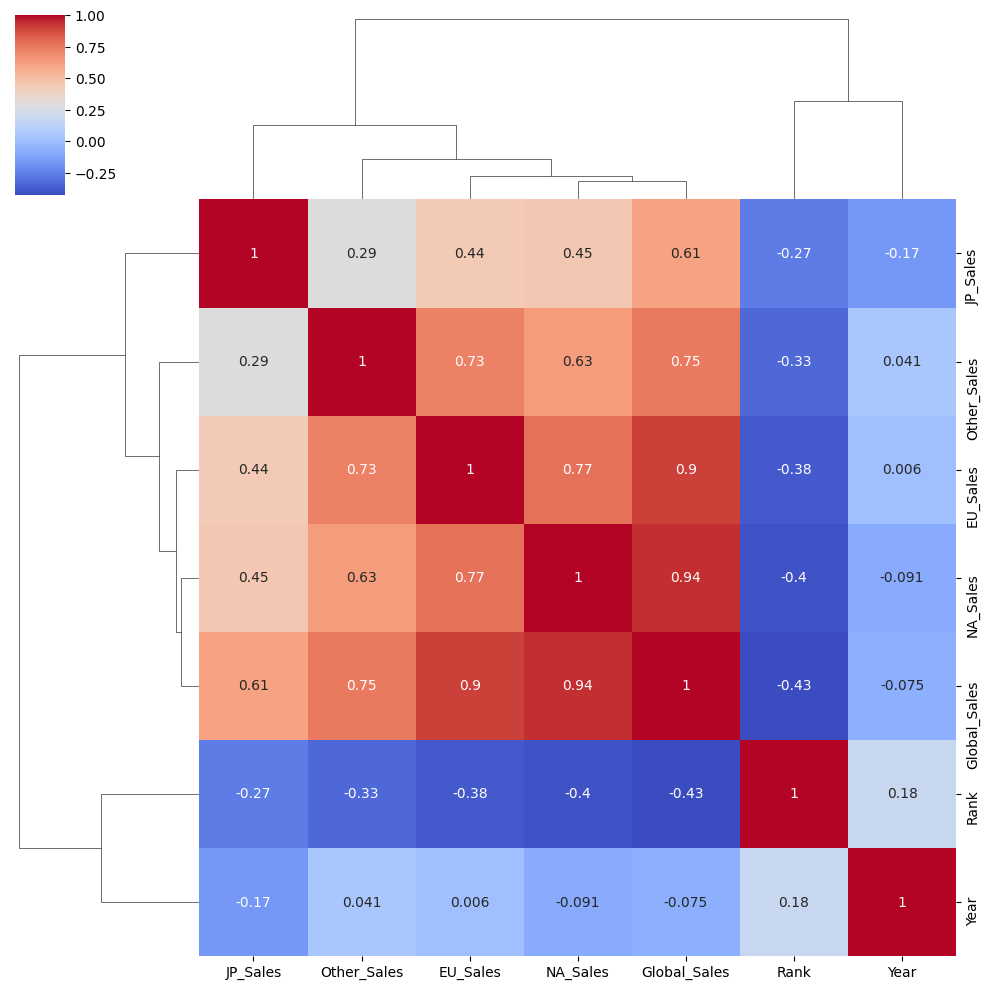

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('vgsales.csv')

# # Select the columns of interest
# subset = data[['Year', 'Global_Sales']]

# # Create a correlation matrix of the columns
# corr_matrix = subset.corr()
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Create a cluster map of the correlation matrix
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True)


Nhận xét:
    

(0.0, 10.0)

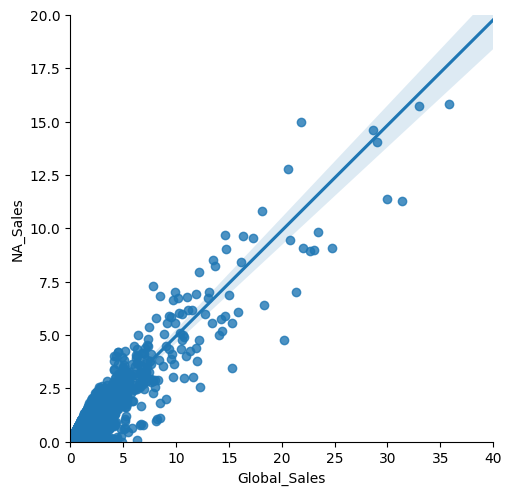

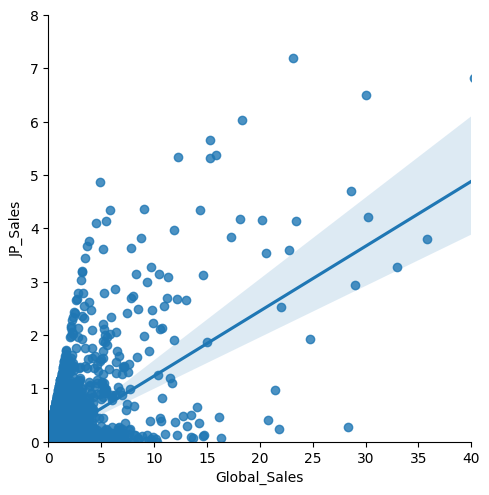

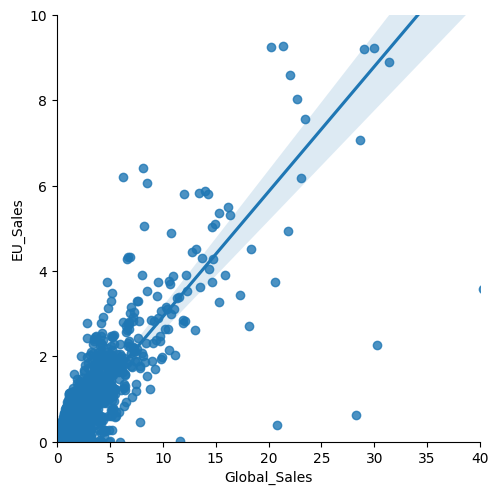

In [36]:
import seaborn as sns
import pandas as pd

# Load data from CSV file
data = pd.read_csv('vgsales.csv')

# Create a linear model plot
sns.lmplot(x='Global_Sales', y='NA_Sales', data=data)

# Set the limits of the x and y axes
plt.xlim(0, 40)
plt.ylim(0, 20)

sns.lmplot(x='Global_Sales', y='JP_Sales', data=data)

# Set the limits of the x and y axes
plt.xlim(0, 40)
plt.ylim(0, 8)

sns.lmplot(x='Global_Sales', y='EU_Sales', data=data)

# # Set the limits of the x and y axes
plt.xlim(0, 40)
plt.ylim(0, 10)

Nhận xét:
